In [1]:
import os, sys
import requests
import pandas as pd
import numpy as np
from fbprophet import Prophet
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# API call paramenters

In [2]:
PROTOCOL        = "http"
API_LANG        = "en"
API_FMT         = "json"
API_DOMAIN      = 'ec.europa.eu/eurostat/wdds'
API_VERS        = 2.1
API_URL         = "{}://{}/rest/data/v{}/{}/{}".format(
                  PROTOCOL, API_DOMAIN, API_VERS, API_FMT, API_LANG
                  )
print(API_URL)

http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en


In [3]:
GEO             = "EU28"
# TIME : all
INDICATOR       = (u'tour_occ_nim', "Tour accomodation")
UNIT            = (u'NR', "Number of nights")
NACE_R2         = (u'I551', "Hotels; holiday and other short-stay accommodation...")
INDIC_TO        = (u'B006', "Nights spent, total")

In [4]:
url             = "{}/{}?geo={}&unit={}&nace_r2={}&indic_to={}".format(
                  API_URL, INDICATOR[0], GEO, UNIT[0], NACE_R2[0], INDIC_TO[0])
print(url)

http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/tour_occ_nim?geo=EU28&unit=NR&nace_r2=I551&indic_to=B006


# API Call Response

In [5]:
session = requests.session()
try:
    response = session.head(url)
    response.raise_for_status()
except:
    raise IOError("ERROR: wrong request formulated")  
else:
    print ("OK: status={}".format(response.status_code))
    
try:    
    response = session.get(url)
except:
    raise IOError('error retrieveing response from URL')

OK: status=200


# JSON Manipulation

In [6]:
# label to Index
resp = response.json()
lbl2idx = resp['dimension']['time']['category']['index']
lbl2idx

{'1990M01': 0,
 '1990M02': 1,
 '1990M03': 2,
 '1990M04': 3,
 '1990M05': 4,
 '1990M06': 5,
 '1990M07': 6,
 '1990M08': 7,
 '1990M09': 8,
 '1990M10': 9,
 '1990M11': 10,
 '1990M12': 11,
 '1991M01': 12,
 '1991M02': 13,
 '1991M03': 14,
 '1991M04': 15,
 '1991M05': 16,
 '1991M06': 17,
 '1991M07': 18,
 '1991M08': 19,
 '1991M09': 20,
 '1991M10': 21,
 '1991M11': 22,
 '1991M12': 23,
 '1992M01': 24,
 '1992M02': 25,
 '1992M03': 26,
 '1992M04': 27,
 '1992M05': 28,
 '1992M06': 29,
 '1992M07': 30,
 '1992M08': 31,
 '1992M09': 32,
 '1992M10': 33,
 '1992M11': 34,
 '1992M12': 35,
 '1993M01': 36,
 '1993M02': 37,
 '1993M03': 38,
 '1993M04': 39,
 '1993M05': 40,
 '1993M06': 41,
 '1993M07': 42,
 '1993M08': 43,
 '1993M09': 44,
 '1993M10': 45,
 '1993M11': 46,
 '1993M12': 47,
 '1994M01': 48,
 '1994M02': 49,
 '1994M03': 50,
 '1994M04': 51,
 '1994M05': 52,
 '1994M06': 53,
 '1994M07': 54,
 '1994M08': 55,
 '1994M09': 56,
 '1994M10': 57,
 '1994M11': 58,
 '1994M12': 59,
 '1995M01': 60,
 '1995M02': 61,
 '1995M03': 62,
 '

In [7]:
# Index to Label
idx2lbl = {v:k for (k,v) in lbl2idx.items()}
idx2lbl

{0: '1990M01',
 1: '1990M02',
 2: '1990M03',
 3: '1990M04',
 4: '1990M05',
 5: '1990M06',
 6: '1990M07',
 7: '1990M08',
 8: '1990M09',
 9: '1990M10',
 10: '1990M11',
 11: '1990M12',
 12: '1991M01',
 13: '1991M02',
 14: '1991M03',
 15: '1991M04',
 16: '1991M05',
 17: '1991M06',
 18: '1991M07',
 19: '1991M08',
 20: '1991M09',
 21: '1991M10',
 22: '1991M11',
 23: '1991M12',
 24: '1992M01',
 25: '1992M02',
 26: '1992M03',
 27: '1992M04',
 28: '1992M05',
 29: '1992M06',
 30: '1992M07',
 31: '1992M08',
 32: '1992M09',
 33: '1992M10',
 34: '1992M11',
 35: '1992M12',
 36: '1993M01',
 37: '1993M02',
 38: '1993M03',
 39: '1993M04',
 40: '1993M05',
 41: '1993M06',
 42: '1993M07',
 43: '1993M08',
 44: '1993M09',
 45: '1993M10',
 46: '1993M11',
 47: '1993M12',
 48: '1994M01',
 49: '1994M02',
 50: '1994M03',
 51: '1994M04',
 52: '1994M05',
 53: '1994M06',
 54: '1994M07',
 55: '1994M08',
 56: '1994M09',
 57: '1994M10',
 58: '1994M11',
 59: '1994M12',
 60: '1995M01',
 61: '1995M02',
 62: '1995M03',
 6

In [8]:
date_index = pd.Series(idx2lbl, name='date_index')
data_values = resp['value']

data_values

{'180': 34915069,
 '181': 36999190,
 '182': 46423990,
 '183': 45144992,
 '184': 65209000,
 '185': 73214480,
 '186': 90574686,
 '187': 95022190,
 '188': 79785215,
 '189': 57938049,
 '190': 32823270,
 '191': 33030321,
 '192': 35947153,
 '193': 37885335,
 '194': 44176225,
 '195': 54068028,
 '196': 66210848,
 '197': 79208156,
 '198': 94993591,
 '199': 97078971,
 '200': 83351922,
 '201': 59152210,
 '202': 34452820,
 '203': 35576665,
 '204': 37140341,
 '205': 39587283,
 '206': 46784809,
 '207': 55668454,
 '208': 68133348,
 '209': 79436481,
 '210': 99243559,
 '211': 101011001,
 '212': 86020945,
 '213': 61538991,
 '214': 36623951,
 '215': 37476511,
 '216': 38428194,
 '217': 42899342,
 '218': 51394009,
 '219': 50724893,
 '220': 72101987,
 '221': 78517155,
 '222': 99896835,
 '223': 99731311,
 '224': 82356752,
 '225': 59058850,
 '226': 33260641,
 '227': 35342396,
 '228': 35665026,
 '229': 36939488,
 '230': 41286849,
 '231': 50580502,
 '232': 62777581,
 '233': 73158200,
 '234': 93013018,
 '235': 9

In [9]:
data = pd.DataFrame(resp['value'], index=['values']).T.reset_index()
data = pd.DataFrame.merge(data, date_index, left_index=True, right_index=True)

data.head()

,index,values,date_index
0,180,34915069,1990M01
1,181,36999190,1990M02
2,182,46423990,1990M03
3,183,45144992,1990M04
4,184,65209000,1990M05


In [10]:
table = data#.drop('index', 1)

In [11]:
table['date_index'] = table['date_index'].str.replace('M','-')

In [12]:
table = table.reset_index().set_index('index')

In [13]:
table = table.drop('level_0', 1)

In [14]:
table

,values,date_index
index,,
180,34915069,1990-01
181,36999190,1990-02
182,46423990,1990-03
183,45144992,1990-04
184,65209000,1990-05
...,...,...
715,94950197,2019-07
716,82148087,2019-08
898,80813747,2019-09


In [15]:
df_plot = table.sort_values('date_index')
ds_last = df_plot['date_index'].values[-1]

In [16]:
df_plot.dtypes

values         int64
date_index    object
dtype: object

In [17]:
df_plot['date_index'] = pd.to_datetime(df_plot['date_index'])

In [18]:
df_plot = df_plot.set_index('date_index')

# Plotting

In [19]:
#for seaborn error
'''
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
'''

'\nfrom pandas.plotting import register_matplotlib_converters\nregister_matplotlib_converters()\n'

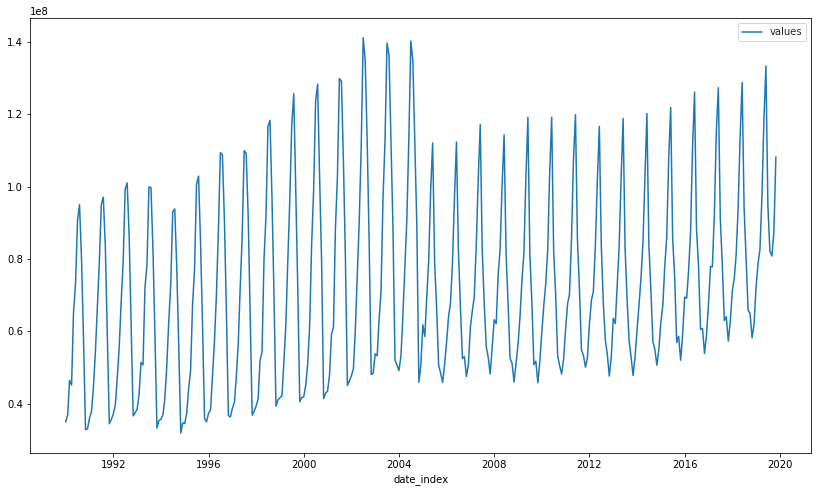

In [20]:
# Ex Seaborn plot

f, ax = plt.subplots(figsize=(14,8))
sns.set_style("darkgrid")
sns.set_style("ticks", 
              {"xtick.major.size":16,"ytick.major.size":16}
             )
sns.axes_style("darkgrid")

g = sns.lineplot(data=df_plot)

In [21]:
df = pd.DataFrame(columns=['ds','y'])

In [22]:
df['ds'] = df_plot.index
df['y'] = df_plot.values

In [23]:
df

,ds,y
0,1990-01-01,34915069
1,1990-02-01,36999190
2,1990-03-01,46423990
3,1990-04-01,45144992
4,1990-05-01,65209000
...,...,...
354,2019-07-01,94950197
355,2019-08-01,82148087
356,2019-09-01,80813747
357,2019-10-01,87420210


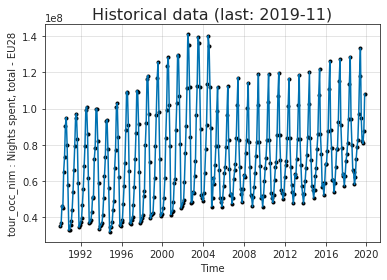

In [24]:
xlabel = "Time"
ylabel = "{} : {} - {}".format(INDICATOR[0], INDIC_TO[1], GEO)  
plt.plot(df['ds'], df['y'], 'k.')
plt.plot(df['ds'], df['y'], ls='-', c='#0072B2')
plt.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
plt.xlabel(xlabel, fontsize=10); plt.ylabel(ylabel, fontsize=10)
plt.title("Historical data (last: {})".format(ds_last), fontsize=16)
plt.show()

In [25]:
m = Prophet(growth = "linear", yearly_seasonality=True, weekly_seasonality=False)

In [26]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
nyears = 5
future = m.make_future_dataframe(periods=12*nyears, freq='M')
fcst = m.predict(future)

In [28]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
414,2024-06-30,1.089948e+08,9.054900e+07,1.288869e+08
415,2024-07-31,1.026408e+08,8.408455e+07,1.216752e+08
416,2024-08-31,8.581473e+07,6.645253e+07,1.048074e+08
417,2024-09-30,7.400000e+07,5.404366e+07,9.245867e+07
418,2024-10-31,5.864295e+07,4.019409e+07,7.839666e+07


Text(0.5, 1, 'Forecast data (5 years)')

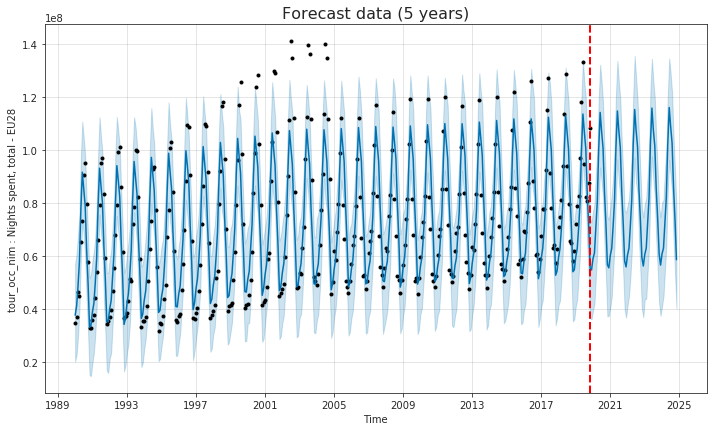

In [29]:
m.plot(fcst, uncertainty=True) 
plt.axvline(pd.to_datetime(ds_last), color='r', linestyle='--', lw=2)
plt.xlabel(xlabel, fontsize=10); plt.ylabel(ylabel, fontsize=10)
plt.title("Forecast data ({} years)".format(nyears), fontsize=16)

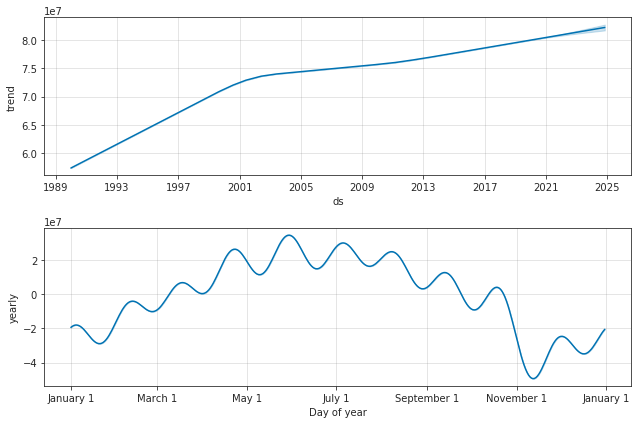

In [30]:
m.plot_components(fcst, uncertainty=True);